# MAT 345 K Means
#### Joanna Li

In [1]:
import pandas as pd                     
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as img

%matplotlib notebook

### 1) KMeans Class

In [2]:
class KMeans(object):

    def __init__(self):
        pass

    """
        Calculates the euclidean distance matrix wise so dont have to go through a loop 
        Params:
            points - array with all the points
            centers - array with all the centroids
        Returns:
            The array with all the distances calcualted (distances[i ,j] = dist between points[i, :] and centers[j, :])
    """
    def euclideanDist(self, points, centers):
        pointsSquared = np.sum(np.square(points), axis = 1);
        centersSquared = np.sum(np.square(centers), axis = 1);
        result = np.dot(points, centers.T);
        
        distances = np.sqrt(abs(pointsSquared[:, np.newaxis] + centersSquared - 2*result))
        return distances

    """
        Initialize centroids
        Params:
            points - data to select centroids from
            k - number of clusters
        Returns:
            Array of centroids
    """
    def initCentroids(self, points, k):
        row, col = points.shape
        centers = np.empty([k, col])
        
        # select centroids by random
        for i in range(k):
            randIndex = np.random.randint(row)
            centers[i] = points[randIndex]
        
        return centers

    """
        Updates the clusters that each points go to
        Params:
            centers - the centroids (k x d dimensions, k = # of clusters)
            points - points to categorize into different clusters (n x d dimensions)
        Returns:
            Array with the cluster assignment for each point (n length)
            
    """
    def updateClusters(self, centers, points):
        row = points.shape[0]
        clusterIndex = np.empty([row])
        
        # calculate the euclidean distances
        distances = self.euclideanDist(points, centers)
        
        # gets  the index of the min dist for each row
        clusterIndex = np.argmin(distances, axis = 1)

        return clusterIndex
    
    """
        Updates the centroids
        Params:
            oldCentroids - the old centers
            clusterIndex - cluster assignment for each point
            points - points to calculate the new centroids with
        Returns:
            The new centroids calculated
    """
    def updateCentroids(self, oldCentroids, clusterIndex, points):
        k = oldCentroids.shape[0]
        newCentroids = np.empty(oldCentroids.shape)
        
        # calculate the new centroids
        for i in range(k):
            cluster = points[clusterIndex == i]
            
            # if there are no points in cluster, then use old centroid, else updated centroid
            if len(cluster) == 0:
                newCentroids[i] = oldCentroids[i]
            else:  
                newCentroids[i] = np.mean(points[clusterIndex == i], axis = 0)
        
        # check if its the same centroids as before
        equal = (oldCentroids == newCentroids).all()
        
        return newCentroids, equal

    """
        Runs the kmeans algorithm
        Params:
            points - the dataset
            k - # of clusters
            maxIter - max number of iterations to go through
        Returns:
            The centroids and cluster indexes
    """
    def __call__(self, points, k, maxIter=100,):
        centers = self.initCentroids(points, k)
        for i in range(maxIter):
            clusterIndex = self.updateClusters(centers, points)
            centers, equal = self.updateCentroids(centers, clusterIndex, points)
            
            if equal:
                break

        return clusterIndex, centers

In [3]:
"""
    Recolors image using kmeans
    Param:
        image - image to cluster/recolor
        clusters - number of clusters
    Returns:
        The updated image with new rgb values
"""
def clusterImages(image, clusters):
    r = image.shape[0]
    c = image.shape[1]
    ch = image.shape[2]
    
    imageValues = image.reshape(r*c,ch)
    
    k = clusters
    clusterIndex, centers = KMeans()(imageValues, k)
    updateImageValues = np.copy(imageValues)

    for i in range(0,k):
        indexCurrCluster = np.where(clusterIndex == i)[0]
        updateImageValues[indexCurrCluster] = centers[i]

    updateImageValues = updateImageValues.reshape(r,c,ch)
    return updateImageValues

In [4]:
"""
    Plot the cluster images
    Param:
        image - image to cluster/recolor
    Returns:
        The figure with the plotted images (original and 3 <= k <= 10 clusters)
"""
def plot(image):
    row = 0
    col = 1
    
    # plot original image
    fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (12.5, 9))
    ax[0, 0].imshow(image)
    ax[0, 0].axis('off')
    ax[0, 0].set_title('Original')
    
    # plot images for 3 <= k <= 10
    for i in range(3, 11):
        newImage = clusterImages(image, i)
        ax[row, col].imshow(newImage)
        ax[row, col].axis('off')
        ax[row, col].set_title('K = ' + str(i))
        
        col = col + 1
        if col > 2:
            row = row + 1 
            col = 0
        
        
    plt.show()

### 2) Read in the 3 images and cluster them

In [5]:
torchic = img.imread('Torchic.png')
amiya = img.imread('Amiya.png')
hotel = img.imread('AbandonedHotel.png')

#### 1st Image

<IPython.core.display.Javascript object>


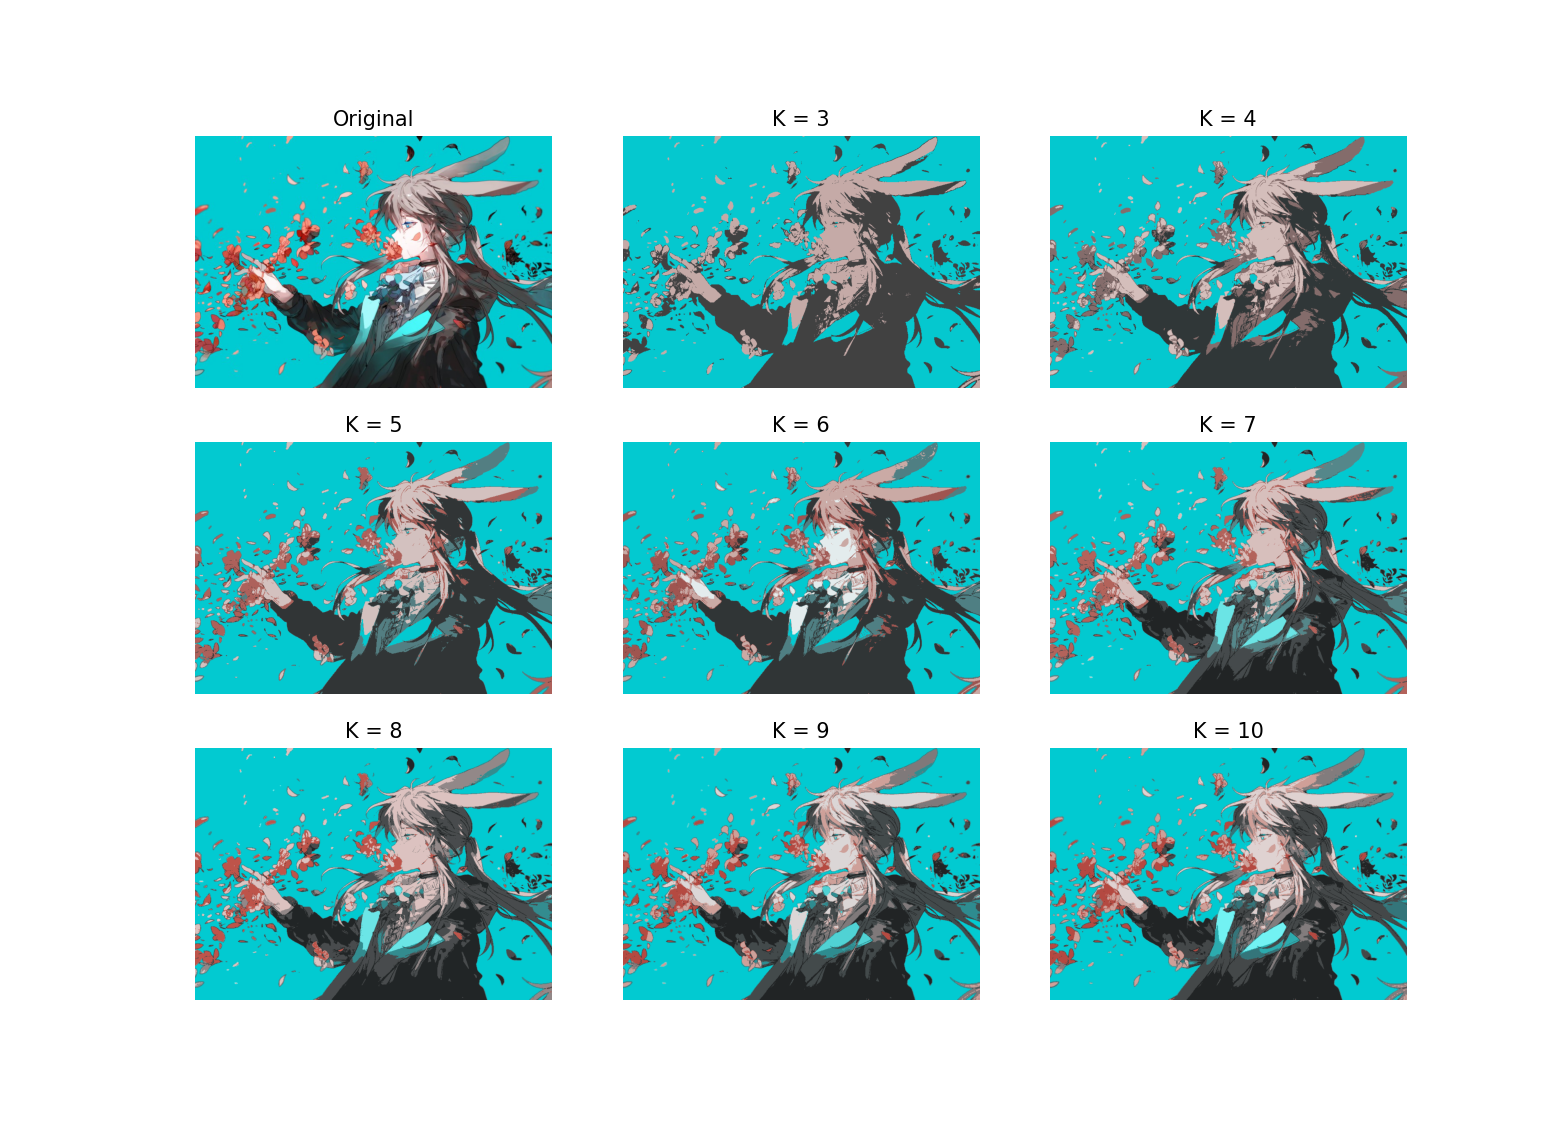

In [6]:
plot(amiya)

#### 2nd Image

<IPython.core.display.Javascript object>


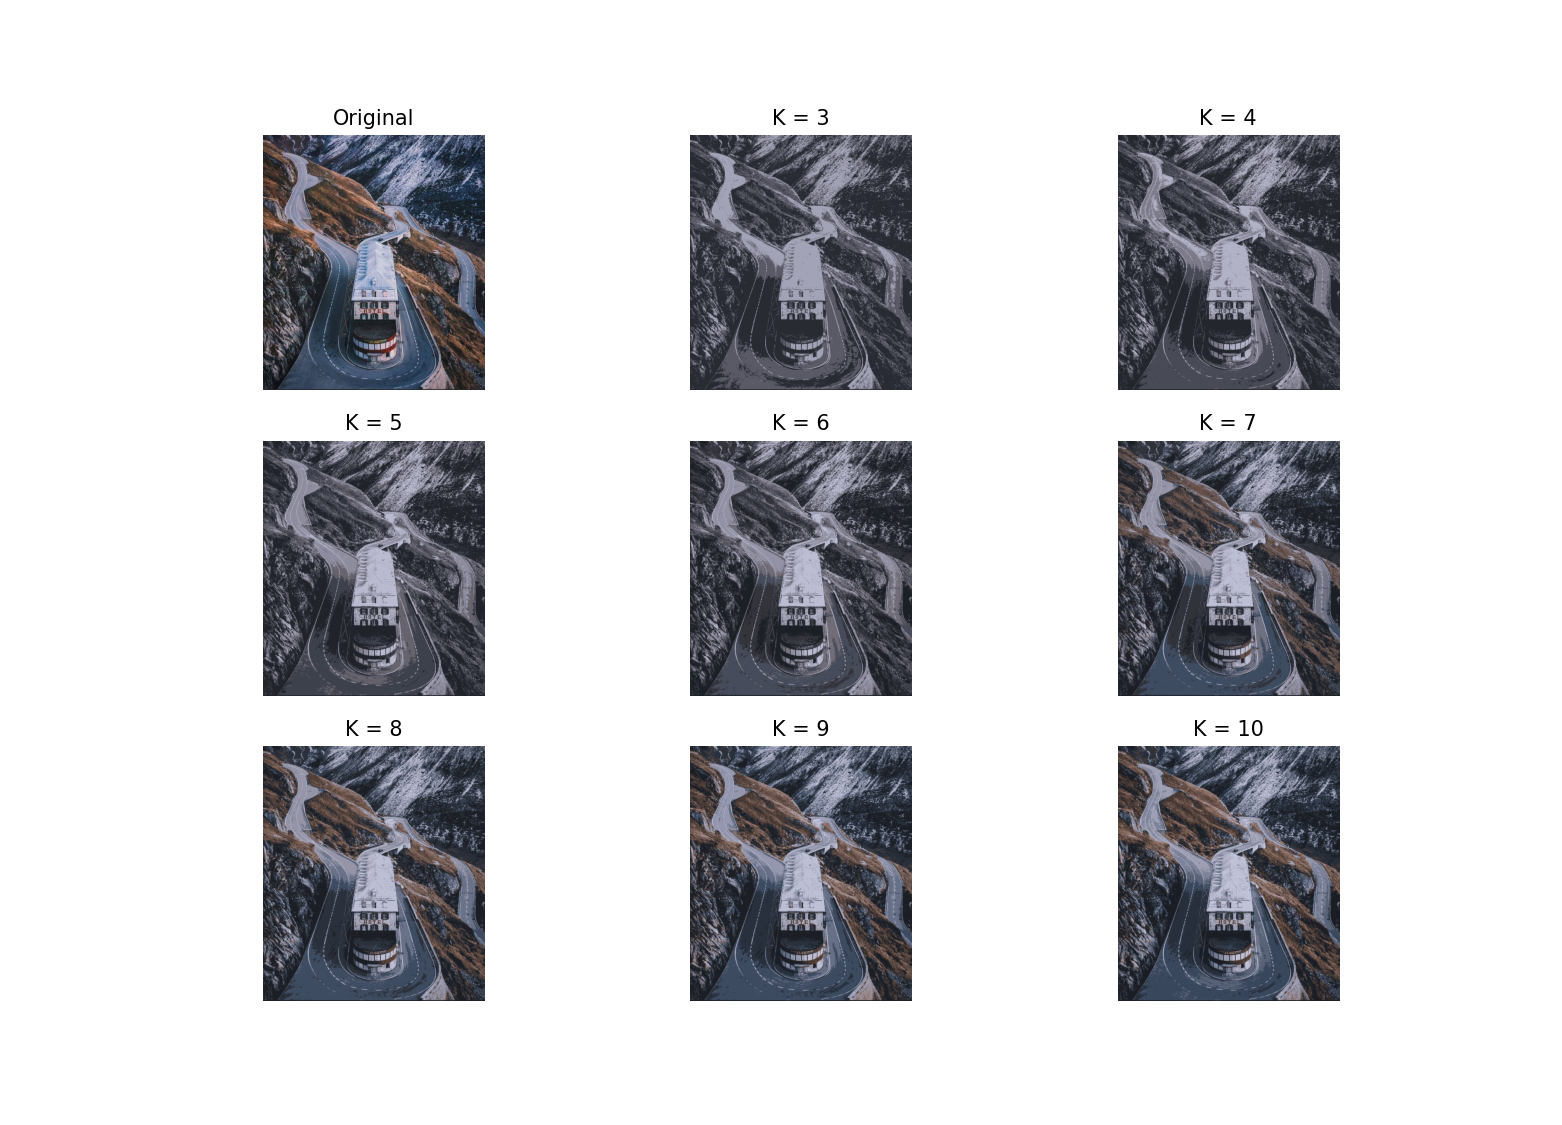

In [7]:
plot(hotel)

#### 3rd Image

<IPython.core.display.Javascript object>


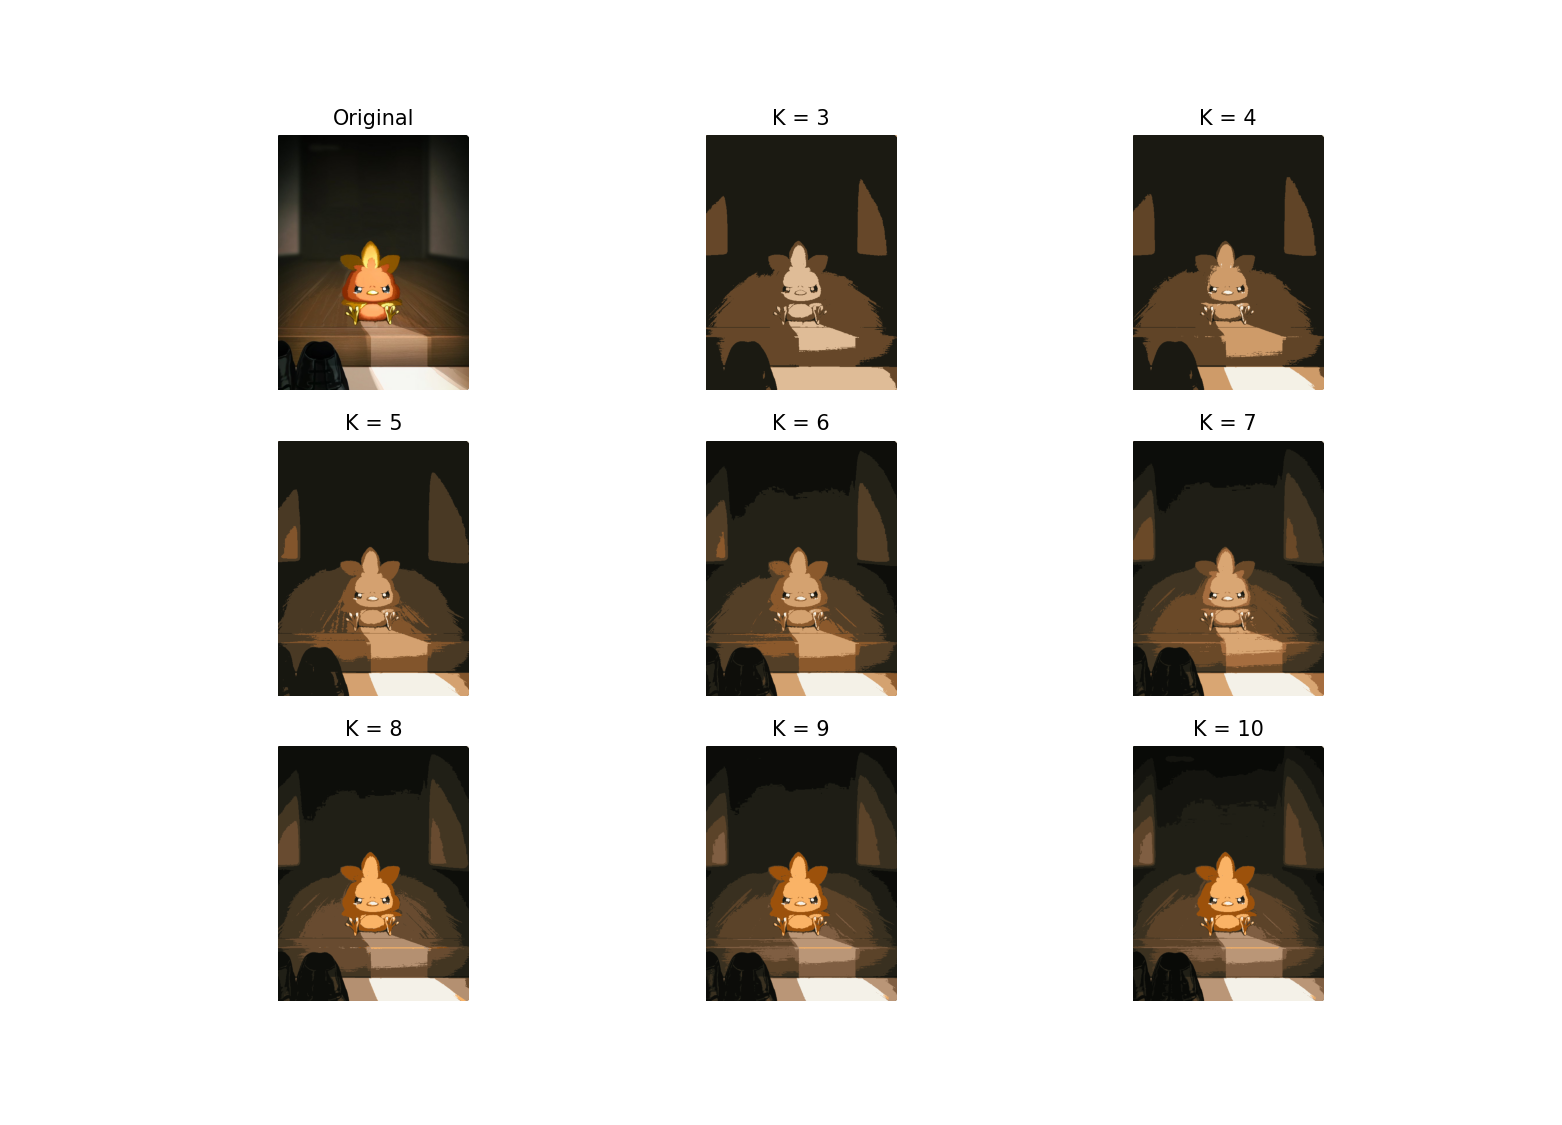

In [8]:
plot(torchic)